### Business Understanding
In the highly competitive streaming industry, platforms like Netflix, Amazon Prime, Hulu, and others aim to retain users and maximize user engagement by providing personalized content. A robust recommendation system is crucial for achieving this goal.

### Business Problem
Enhancing User Retention and Engagement through Personalized Recommendations

### objective
1. Increase User Engagement: By recommending movies that align with a user's preferences, the platform can encourage users to spend more time on the platform, thereby increasing engagement.

2. Improve User Retention: Personalized recommendations can lead to higher user satisfaction, reducing the churn rate and ensuring users stay subscribed to the service.

3. Drive Revenue Growth: Higher engagement and retention rates can lead to increased subscription renewals and potential upsells of premium services.

4. Competitive Advantage: Offering superior personalization compared to competitors can differentiate the platform, attracting more users.

### Key Performance Indicators (KPIs)

- User Engagement Metrics:
Average watch time per user,
Number of movies watched per user &
Frequency of user visits

- User Retention Metrics:
Monthly and yearly retention rates &
Churn rate

- Recommendation Performance Metrics:
Click-through rate (CTR) on recommended movies,
Conversion rate (proportion of recommendations that lead to a watch) &
Precision and recall of the recommendation system

### Stakeholders
1. Product Managers: Interested in the overall functionality and performance of the recommendation system.
2. Marketing Teams: Focus on using personalized recommendations to target users with relevant content.
3. Data Scientists and Engineers: Responsible for building, testing, and maintaining the recommendation system.
4. Executives: Concerned with how the recommendation system impacts business goals like user retention, engagement, and revenue.
Solution
### Collaborative Filtering-Based Recommendation System

1. User-Based Collaborative Filtering: Recommend movies based on the ratings and preferences of similar users.

2. Item-Based Collaborative Filtering (Optional): Recommend movies based on similarity between items (movies).

3. Hybrid Approach (Optional): Combine collaborative filtering with content-based filtering to address cold start problems and improve reccommendation

### Implementation Plan

- Data Collection and Preprocessing:
Gather user ratings data from the MovieLens dataset.
Clean and preprocess the data for analysis.

- Model Development:
 Develop a collaborative filtering model to generate personalized movie recommendations.
Optional: Enhance the model with a hybrid approach for improved accuracy.
- Evaluation:
 Evaluate the model using metrics like precision, recall, and RMSE.
Conduct A/B testing to compare the new recommendation system against existing methods.
- Deployment:
Integrate the recommendation system into the platform.
Create a user interface for users to rate movies and receive recommendations.

- Monitoring and Optimization:
 Continuously monitor the performance of the recommendation system.
Update and refine the model based on user feedback and new data.

### Challenges
1. Data Sparsity: Many users might rate only a few movies, leading to sparse user-item matrices.

2. Cold Start Problem: New users or movies with little to no ratings can be difficult to recommend.

3. Scalability: As the number of users and movies grows, ensuring the recommendation system remains efficient and responsive is crucial.

By addressing these challenges and focusing on the outlined objectives, the recommendation system can significantly enhance the user experience, leading to increased engagement, retention, and ultimately, revenue growth for the streaming platform.

In [1]:
# Import necessary libraries for data manipulation and numerical computations
import pandas as pd
import numpy as np

# Import machine learning libraries
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Import library for handling sparse matrices
from scipy.sparse import csr_matrix

# Import warnings library to manage warnings
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#load the datasets
ratings = pd.read_csv('Movies_datasets/ratings.csv', index_col = 0)
movies = pd.read_csv('Movies_datasets/movies.csv', index_col = 0)
links = pd.read_csv('Movies_datasets/links.csv', index_col = 0)



In [4]:
#checking the first and last rows in the ratings dataset
ratings

,movieId,rating,timestamp
userId,,,
1,1,4.0,964982703
1,3,4.0,964981247
1,6,4.0,964982224
1,47,5.0,964983815
1,50,5.0,964982931
...,...,...,...
610,166534,4.0,1493848402
610,168248,5.0,1493850091
610,168250,5.0,1494273047


In [5]:
#checking the first and last rows in the movies dataset
movies

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy
...,...,...
193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
193585,Flint (2017),Drama


In [6]:
#checking the first and last rows in the links dataset
links

,imdbId,tmdbId
movieId,,
1,114709,862.0
2,113497,8844.0
3,113228,15602.0
4,114885,31357.0
5,113041,11862.0
...,...,...
193581,5476944,432131.0
193583,5914996,445030.0
193585,6397426,479308.0


In [52]:
file_paths = {
    'ratings': 'Movies_datasets/ratings.csv',
    'movies': 'Movies_datasets/movies.csv',
    'links': 'Movies_datasets/links.csv',
    'tags': 'Movies_datasets/tags.csv'  # Corrected the file name to 'tags.csv'
}

# Load the data
def load_data(file_paths):
    data = {}
    for name, path in file_paths.items():
        print(f'Loading {name} data csv file...')
        try:
            data[name] = pd.read_csv(path)
            print(f'{name} dataset loaded successfully from {path}\n')
        except FileNotFoundError:
            print(f'Error: The file \'{path}\' was not found.')
        except Exception as e:
            print(f'Error: An unexpected error occurred: {e}')
    return data

data = load_data(file_paths)

# Merge the data
def merge_data(data):
    try:
        print('Merging data on movieId...')
        merged_data = pd.merge(data['movies'], data['ratings'], on='movieId', how='left')
        merged_data = pd.merge(merged_data, data['tags'], on='movieId', how='left')
        merged_data = pd.merge(merged_data, data['links'], on='movieId', how='left')
        print('Data merged successfully\n')
        return merged_data
    except KeyError as e:
        print(f'Error: A KeyError occurred: {e}. Please ensure all DataFrames contain the column \'movieId\'.')
        return None

merged_data = merge_data(data)

# Get the shape of the merged DataFrame
def get_shape(merged_data):
    if merged_data is not None:
        rows, columns = merged_data.shape
        print(f'The merged DataFrame has {rows} rows and {columns} columns.\n')
    else:
        print('Error: No merged data available. Please call the merge_data() method first.')

get_shape(merged_data)

# Summarize the merged DataFrame info
def summarize_info(merged_data):
    print('Summarizing the merged DataFrame info')
    print('-------------------------------')
    if merged_data is not None:
        print(merged_data.info())
    else:
        print('Error: No merged data available. Please call the merge_data() method first.')

summarize_info(merged_data)

# Describe the merged DataFrame
def describe_data(merged_data):
    print('\nDescribing the merged DataFrame data')
    print('--------------------------------')
    if merged_data is not None:
        print(merged_data.describe())
    else:
        print('Error: No merged data available. Please call the merge_data() method first.')

describe_data(merged_data)

Loading ratings data csv file...
ratings dataset loaded successfully from Movies_datasets/ratings.csv

Loading movies data csv file...
movies dataset loaded successfully from Movies_datasets/movies.csv

Loading links data csv file...
links dataset loaded successfully from Movies_datasets/links.csv

Loading tags data csv file...
tags dataset loaded successfully from Movies_datasets/tags.csv

Merging data on movieId...
Data merged successfully

The merged DataFrame has 285783 rows and 11 columns.

Summarizing the merged DataFrame info
-------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285783 entries, 0 to 285782
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   movieId      285783 non-null  int64  
 1   title        285783 non-null  object 
 2   genres       285783 non-null  object 
 3   userId_x     285762 non-null  float64
 4   rating       285762 non-null  float64
 5   timestamp_x 

In [54]:
merged_data.describe()

,movieId,userId_x,rating,timestamp_x,userId_y,timestamp_y,imdbId,tmdbId
count,285783.000000,285762.000000,285762.000000,2.857620e+05,233234.000000,2.332340e+05,2.857830e+05,285770.000000
mean,14927.663741,313.894279,3.841270,1.214707e+09,470.681354,1.384754e+09,2.956050e+05,12797.315320
std,31402.673519,179.451387,1.020798,2.233730e+08,153.324249,1.534705e+08,5.150156e+05,43479.255523
min,1.000000,1.000000,0.500000,8.281246e+08,2.000000,1.137179e+09,4.170000e+02,2.000000
25%,296.000000,160.000000,3.000000,1.019133e+09,424.000000,1.242494e+09,1.098300e+05,489.000000
50%,1721.000000,314.000000,4.000000,1.211377e+09,477.000000,1.457901e+09,1.125730e+05,680.000000
75%,5673.000000,465.000000,4.500000,1.445346e+09,599.000000,1.498457e+09,2.415270e+05,8963.000000
max,193609.000000,610.000000,5.000000,1.537799e+09,610.000000,1.537099e+09,8.391976e+06,525662.000000


In [7]:
#chacking the columns in the ratings dataset
ratings.columns

Index(['movieId', 'rating', 'timestamp'], dtype='object')

In [8]:
#checking the columns in the movies dataset
movies.columns

Index(['title', 'genres'], dtype='object')

In [9]:
#checking the columns in the links dataset
links.columns

Index(['imdbId', 'tmdbId'], dtype='object')

### Checking the Datasets

In [10]:
#checking the dataset information
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100836 entries, 1 to 610
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieId    100836 non-null  int64  
 1   rating     100836 non-null  float64
 2   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 3.1 MB


In [11]:
#checking the dataset information
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9742 entries, 1 to 193609
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   9742 non-null   object
 1   genres  9742 non-null   object
dtypes: object(2)
memory usage: 228.3+ KB


In [12]:
#checking the links dataset information
links.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9742 entries, 1 to 193609
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   imdbId  9742 non-null   int64  
 1   tmdbId  9734 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 228.3 KB


In [13]:
#previewing the datatypes in ratings dataframe
ratings.dtypes

movieId        int64
rating       float64
timestamp      int64
dtype: object

In [14]:
#previewing the datatypes in movies dataframe
movies.dtypes

title     object
genres    object
dtype: object

In [15]:
#previewing the datatypes in links dataframe
links.dtypes

imdbId      int64
tmdbId    float64
dtype: object

In [16]:
#Determining the no of records in our datasets
ratings.shape, movies.shape, links.shape


((100836, 3), (9742, 2), (9742, 2))

In [17]:
#summary of the data contained in ratings dataset
ratings.describe()

,movieId,rating,timestamp
count,100836.000000,100836.000000,1.008360e+05
mean,19435.295718,3.501557,1.205946e+09
std,35530.987199,1.042529,2.162610e+08
min,1.000000,0.500000,8.281246e+08
25%,1199.000000,3.000000,1.019124e+09
50%,2991.000000,3.500000,1.186087e+09
75%,8122.000000,4.000000,1.435994e+09
max,193609.000000,5.000000,1.537799e+09


In [18]:
#summary of the data contained in the movies dataset
movies.describe()

,title,genres
count,9742,9742
unique,9737,951
top,Emma (1996),Drama
freq,2,1053


In [19]:
#summary of the data contained in the links dataset
links.describe()

,imdbId,tmdbId
count,9.742000e+03,9734.000000
mean,6.771839e+05,55162.123793
std,1.107228e+06,93653.481487
min,4.170000e+02,2.000000
25%,9.518075e+04,9665.500000
50%,1.672605e+05,16529.000000
75%,8.055685e+05,44205.750000
max,8.391976e+06,525662.000000


In [20]:
#checking for the variance between the mean and the column rating
ratings['rating'].var()

1.086867214296347

In [21]:
#checking for unique values
movies['genres'].unique()


array(['Adventure|Animation|Children|Comedy|Fantasy',
       'Adventure|Children|Fantasy', 'Comedy|Romance',
       'Comedy|Drama|Romance', 'Comedy', 'Action|Crime|Thriller',
       'Adventure|Children', 'Action', 'Action|Adventure|Thriller',
       'Comedy|Horror', 'Adventure|Animation|Children', 'Drama',
       'Action|Adventure|Romance', 'Crime|Drama', 'Drama|Romance',
       'Action|Comedy|Crime|Drama|Thriller', 'Comedy|Crime|Thriller',
       'Crime|Drama|Horror|Mystery|Thriller', 'Drama|Sci-Fi',
       'Children|Drama', 'Adventure|Drama|Fantasy|Mystery|Sci-Fi',
       'Mystery|Sci-Fi|Thriller', 'Children|Comedy', 'Drama|War',
       'Action|Crime|Drama', 'Action|Adventure|Fantasy',
       'Comedy|Drama|Thriller', 'Mystery|Thriller',
       'Animation|Children|Drama|Musical|Romance',
       'Crime|Mystery|Thriller', 'Adventure|Drama', 'Drama|Thriller',
       'Comedy|Crime', 'Action|Sci-Fi|Thriller',
       'Action|Comedy|Horror|Thriller', 'Comedy|Drama', 'Documentary',
       'Ac

### Data Cleaning


In [22]:
#Checking null values in ratings dataset
ratings.isnull().sum()

movieId      0
rating       0
timestamp    0
dtype: int64

In [23]:
#Checking null values in movies dataset
movies.isnull().sum()

title     0
genres    0
dtype: int64

In [24]:
#Checking null values in links dataset
links.isnull().sum()

imdbId    0
tmdbId    8
dtype: int64

In [25]:
#Checking for duplicates
ratings.duplicated().any()


False

In [26]:
#checking for duplicates
movies.duplicated().any()

False

In [27]:
#Checking for duplicates
links.duplicated().any()

False

###  Exploratory Data Analysis

Exploratory Data Analysis is an approach to analyse data to summarise their main characteristics and often with visual methods.

### Univariate Data Analysis

The term univariate analysis refers to the analysis of one variable. You can remember this because the prefix “uni” means “one.”

The purpose of univariate analysis is to understand the distribution of values for a single variable.

### Histogram

### Ratings dataset

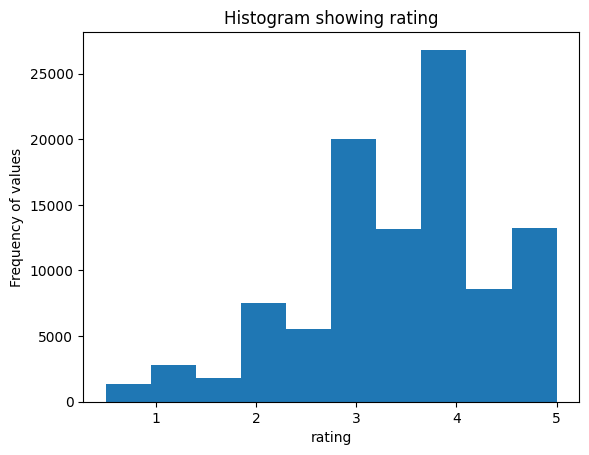

In [28]:
#Histrogram showing ratings
x=ratings['rating']
#when you are plotting the histogram,plt.hist(have the necessary parameters here)
plt.hist(x, bins=10, histtype='bar')
#when to give my plot a title
plt.title('Histogram showing rating')
plt.xlabel('rating')
plt.ylabel('Frequency of values')
plt.show()



The majority of ratings are clustered around the higher end of the scale, particularly around 4.0, indicating that users tend to rate movies positively. There are fewer low ratings, suggesting that either the movies are generally well-received, or users are more generous with their ratings. This kind of analysis is crucial for understanding user behavior and preferences, which is essential for building effective recommendation systems.

### Links dataset

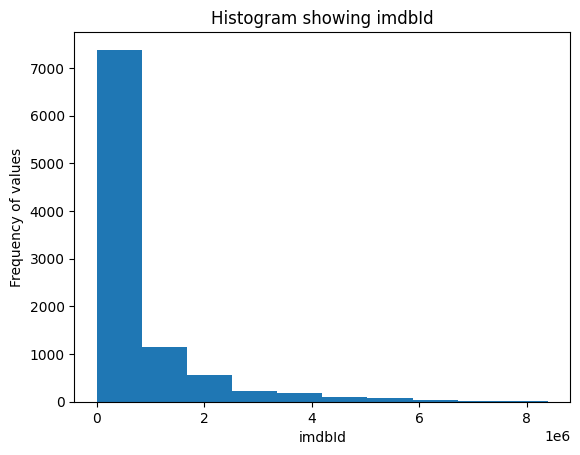

In [29]:
#Histrogram showing links
x=links['imdbId']
#when you are plotting the histogram,plt.hist(have the necessary parameters here)
plt.hist(x, bins=10, histtype='bar')
#when to give my plot a title
plt.title('Histogram showing imdbId')
plt.xlabel('imdbId')
plt.ylabel('Frequency of values')
plt.show()



The right-skewness of the distribution suggests that only a small proportion of movies have very high IMDb IDs, which could be more recent additions to the IMDb database.

### Movies dataset

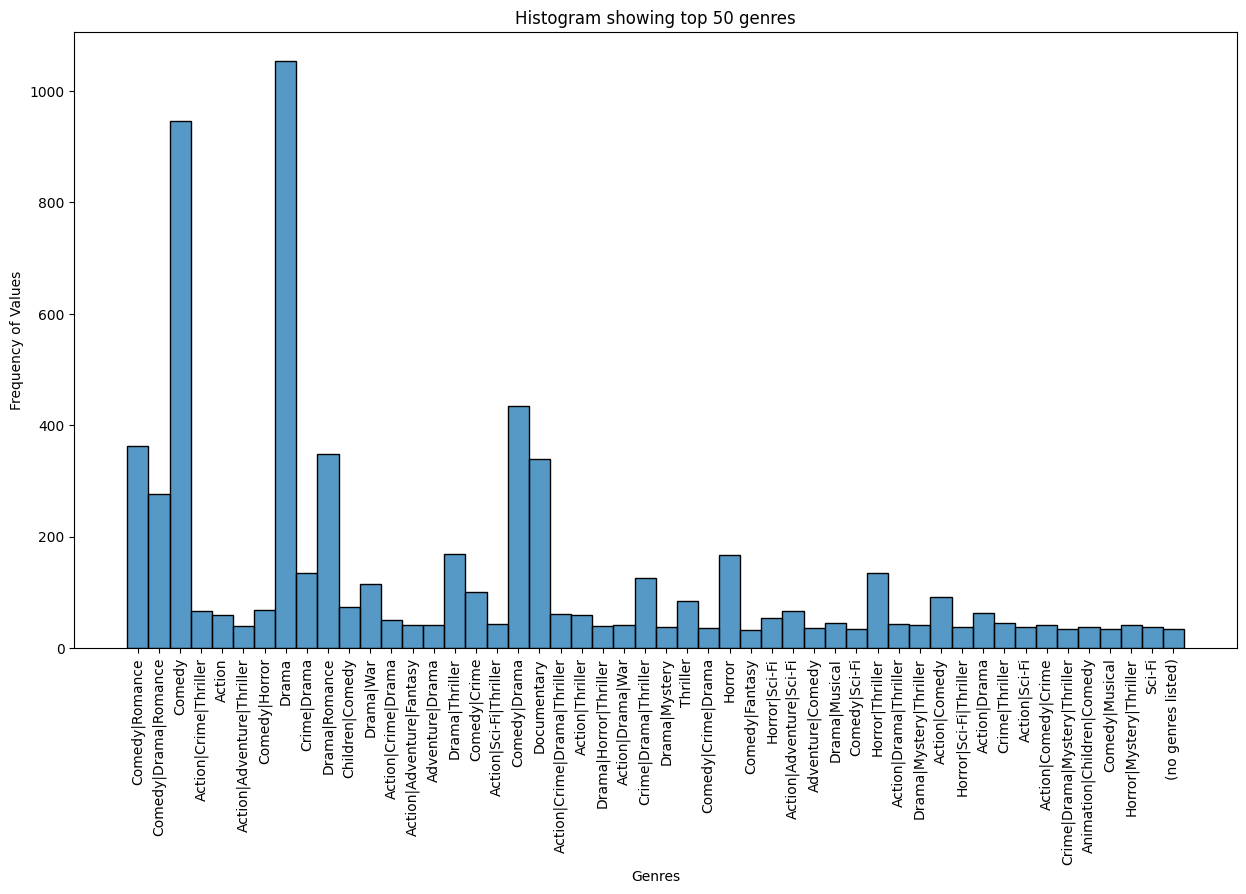

In [30]:


# Count the occurrences of each genre
genre_counts = movies['genres'].value_counts()

# Get the top 50 genres
top_50_genres = genre_counts.head(50).index

# Filter the DataFrame to include only the top 50 genres
filtered_df = movies[movies['genres'].isin(top_50_genres)]

# Plot the histogram
plt.figure(figsize=(15, 8))
sns.histplot(data=filtered_df, x='genres', discrete=True)
plt.xticks(rotation=90)
plt.title('Histogram showing top 50 genres')
plt.xlabel('Genres')
plt.ylabel('Frequency of Values')
plt.show()


the above histogram helps us analyse which genre has the highest frequency value, from the graph  drama followed by comedy have a high frequency value.

### Box Plot
### Ratings dataset

Text(0.5, 1.0, 'Distribution of timestamp')

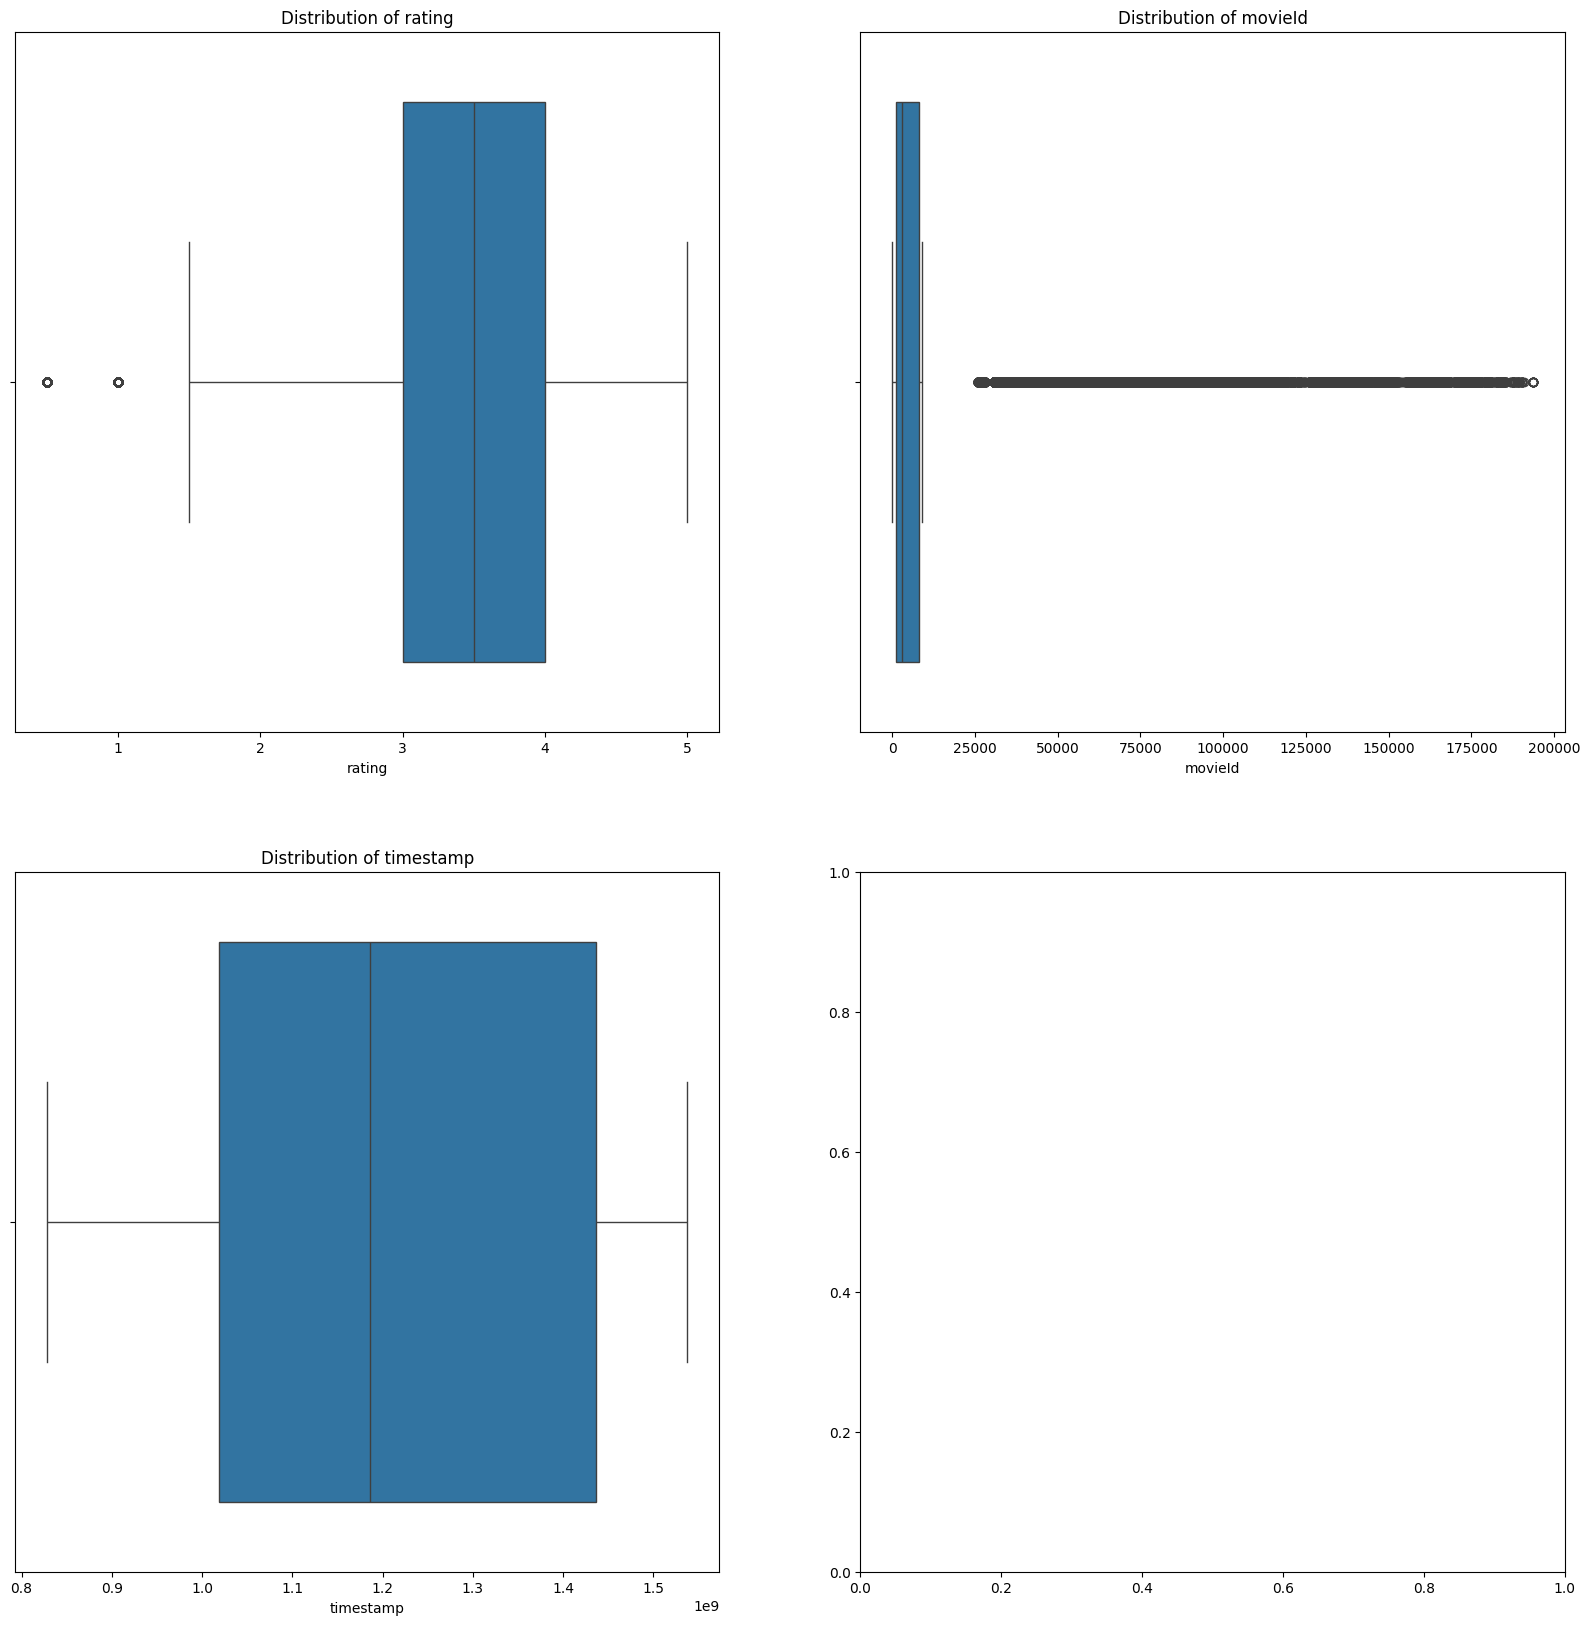

In [31]:
#Checking for anomalies and outliers in the ratings dataset
fig, ax = plt.subplots(2,2, figsize=[20,20])
sns.boxplot(x='rating', data=ratings, ax=ax[0,0])
sns.boxplot(x= 'movieId', data=ratings, ax=ax[0,1])
sns.boxplot(x='timestamp', data=ratings, ax=ax[1,0])


# Setting the Title of the Plots
ax[0,0].set_title("Distribution of rating")
ax[0,1].set_title("Distribution of movieId")
ax[1,0].set_title("Distribution of timestamp")


A boxplot displays the five-number summary of a set of data.
The five-number summary is the minimum, first quartile, median, third quartile, and maximum.

Box plots give a good graphical image of the concentration of the data. They also show how far the extreme values are from most of the data. from the data we an see the disribution of our values.


### Links dataset

Text(0.5, 1.0, 'Distribution of tmdbId')

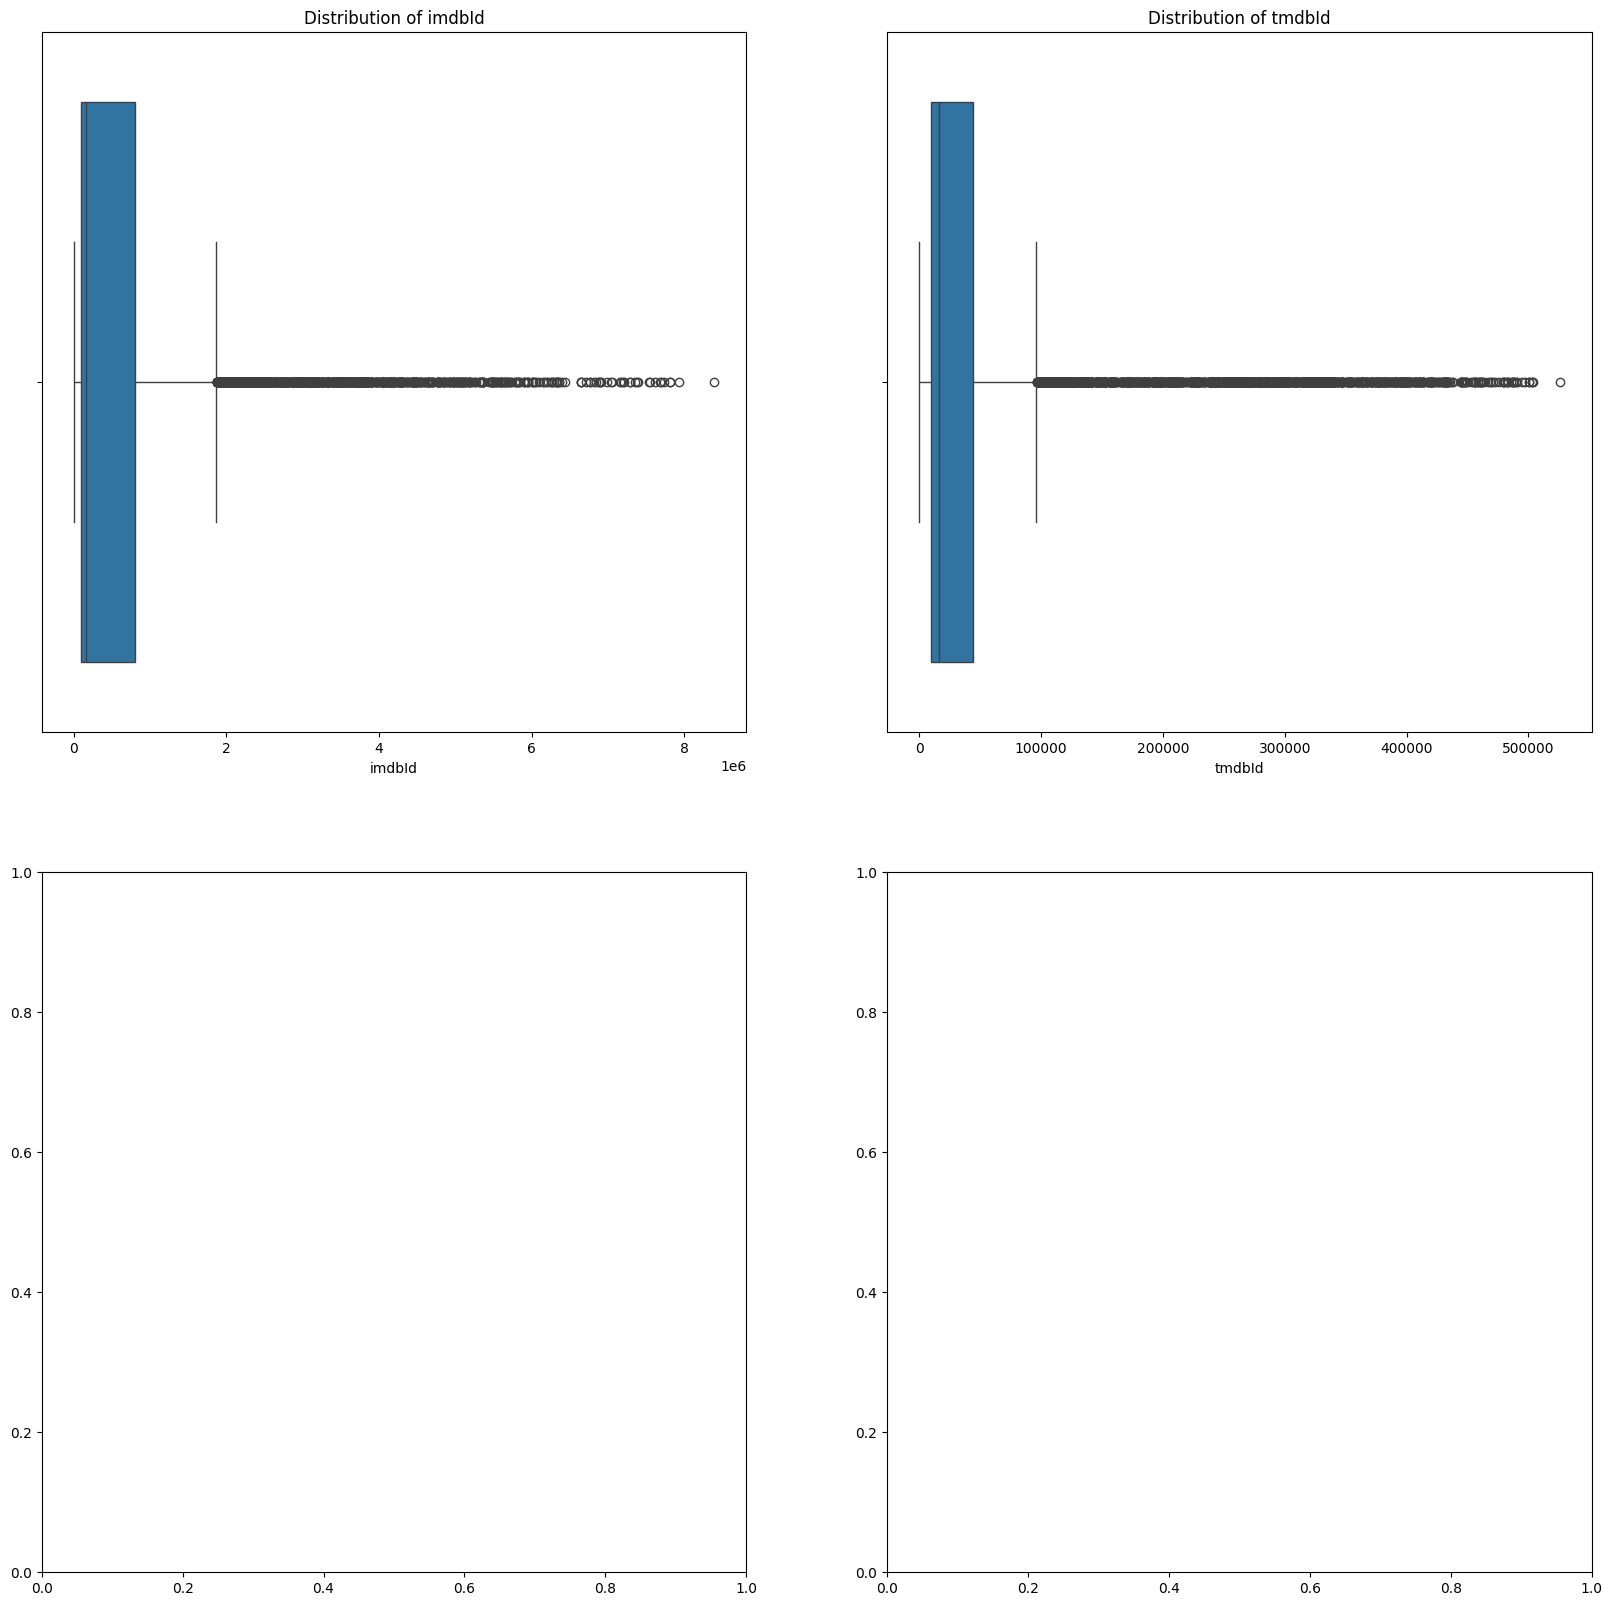

In [33]:
#Checking for anomalies and outliers in the links dataset
fig, ax = plt.subplots(2,2, figsize=[20,20])
sns.boxplot(x='imdbId', data=links, ax=ax[0,0])
sns.boxplot(x= 'tmdbId', data=links, ax=ax[0,1])



# Setting the Title of the Plots
ax[0,0].set_title("Distribution of imdbId")
ax[0,1].set_title("Distribution of tmdbId")



most of the values in the above  links dataset lie in the between the median and the maximum. it helps us identify outliers before modelling